## Multiclass Perceptron

In [1]:
#Python version
!python --version #This assignment use the version of 3.6.0

Python 3.6.4 :: Anaconda, Inc.


In [2]:
from csv import reader  #read csv
import random    #random training set
import pandas as pd  #create dataframe
import numpy as np  #calculations
import matplotlib   #plotting
import matplotlib.pyplot as plt 
matplotlib.style.use('ggplot') #plotting style

#### step I.	
Load Task2C_train.csv and Task2C_test.csv sets.

In [3]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        #read file
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            #add each row in list
            dataset.append(row)
    #remove the header
    dataset.pop(0)
    return dataset

In [4]:
#read training data
trainset=load_csv("Task2C_train.csv")

In [5]:
#read test data
testset=load_csv("Task2C_test.csv")

#### Step II:	
Implement the multiclass perceptron as explained above. Please provide enough comments for your code in your submission.

In [6]:
# Make a prediction with weights
def predict(row, weights):
    # matrix multiplication
    return row.dot(weights)

In [7]:
#training weights
def train_weights(dataset, classes, l_rate, n_epoch):
    bias=1
    classes_list=list(classes)
    #
    feature_list=4
    #make a dictionary that key is each feature and the value is their correponding initial random weights
    weight_vectors={c: np.array([random.uniform(0,1) for n in range(feature_list+ 1)]) for c in classes_list}
    
    #for each iteration
    for epo in range(n_epoch):
        #for each row in dataset
        for data in dataset:
            #extract x
            train_x=data[:-1]
            #extract label
            train_y=data[-1]
            #change datatype to float and add a bias value
            data_array=np.asarray([float(i) for i in train_x]+[float(bias)])
            print(data_array)
            
            #set initial arg_max=0 and classes is the first feature in the classes list
            arg_max,predicted_class=0,classes_list[0]
            
            #for each feature in classes list
            for feature in classes_list:
                current_activation=predict(data_array, weight_vectors[feature])
                #if activation larger than arg_max, then replace new activation with arg_max and feature with new predicted feature
                if current_activation>=arg_max:
                    arg_max, predicted_class=current_activation, feature
            
            #if predicted label is not equal to ture label
            if train_y != predicted_class:
                #then predicted weight should plus learning rate*x, here using minus is because vector is always toward negative direction
                weight_vectors[predicted_class]-= data_array*l_rate
                #orginal weight should minus learning rate*x
                weight_vectors[train_y]+= data_array*l_rate
                
    return weight_vectors    

In [9]:
def multiclass_perceptron(training_set, testset, n_minibatch, l_rate, n_epoch):
    #set bias equals 1
    bias=1
    #extract all of classes
    classes_list=set()
    for each in testset:
        classes_list.add(each[-1])
    #change datatype of set to list
    classes=list(classes_list)
    errors_list=[]
    
    #shuffle training data
    training = random.sample(training_set, len(training_set))
    
    #for each increasing 5 training set
    for idx in range(0, len(training)+1, n_minibatch):
        errors=0
        #calculate weight
        weight_vectors=train_weights(training[:idx], classes, l_rate, n_epoch)
        for row in testset:
            test_x=row[:-1]
            test_y=row[-1]
            #change data into float type and plua a bias=1
            data_array=np.asarray([float(i) for i in test_x]+[float(bias)])
            
            #set initial arg_max=0 and classes is the first feature in the classes list
            arg_max, predicted_class=0,classes[0]
            
            #for each feature in classes
            for feature in classes:
                #calculate activation
                current_activation=predict(data_array,weight_vectors[feature])
                #if activation larger than arg_max, then replace new activation with arg_max and feature with new predicted feature
                if current_activation>=arg_max:
                    arg_max, predicted_class=current_activation, feature
            
              #if predicted label is not equal to true label, then error plus 1
            if test_y != predicted_class:
                errors+=1
        
        errors_list.append(errors)
        
    
    return errors_list

#### Step III: 
Set the learning rate η to .1, and train the multiclass perceptron on the provided training data. After processing every 5 training data points (also known as a mini-batch), evaluate the error of the current model on the test data. Plot the error of the test data vs the number of mini-batches, and include it in your Jupyter Notebook file for Question 8.

In [10]:
n_epoch=20 #number of iteration
l_rate=0.1 #learning rate
n_minibatch=5 #5 set each for training

error_set=multiclass_perceptron(trainset, testset, n_minibatch, l_rate, n_epoch)

[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[6.1 2.6 5

[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5

[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3

[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1

[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[5.9 3.2 4.8 1.8 1. ]
[5.1 3.8 1.9 0.4 1. ]
[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5

[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[5.9 3.2 4.8 1.8 1. ]
[5.1 3.8 1.9 0.4 1. ]
[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3

[5.9 3.2 4.8 1.8 1. ]
[5.1 3.8 1.9 0.4 1. ]
[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[5.9 3.2 4

[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[5.9 3.2 4.8 1.8 1. ]
[5.1 3.8 1.9 0.4 1. ]
[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.3 3.3 4.7 1.6 1. ]
[5.6 2.7 4.2 1.3 1. ]
[6.4 2.9 4.3 1.3 1. ]
[5.4 3.4 1.7 0.2 1. ]
[5.8 2.8 5.1 2.4 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5

[5.9 3.2 4.8 1.8 1. ]
[5.1 3.8 1.9 0.4 1. ]
[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.3 3.3 4.7 1.6 1. ]
[5.6 2.7 4.2 1.3 1. ]
[6.4 2.9 4.3 1.3 1. ]
[5.4 3.4 1.7 0.2 1. ]
[5.8 2.8 5.1 2.4 1. ]
[4.4 2.9 1.4 0.2 1. ]
[5.2 4.1 1.5 0.1 1. ]
[4.6 3.6 1.  0.2 1. ]
[5.  3.4 1.6 0.4 1. ]
[4.9 3.1 1.5 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1

[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.3 3.3 4.7 1.6 1. ]
[5.6 2.7 4.2 1.3 1. ]
[6.4 2.9 4.3 1.3 1. ]
[5.4 3.4 1.7 0.2 1. ]
[5.8 2.8 5.1 2.4 1. ]
[4.4 2.9 1.4 0.2 1. ]
[5.2 4.1 1.5 0.1 1. ]
[4.6 3.6 1.  0.2 1. ]
[5.  3.4 1.6 0.4 1. ]
[4.9 3.1 1.5 0.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6

[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.3 3.3 4.7 1.6 1. ]
[5.6 2.7 4.2 1.3 1. ]
[6.4 2.9 4.3 1.3 1. ]
[5.4 3.4 1.7 0.2 1. ]
[5.8 2.8 5.1 2.4 1. ]
[4.4 2.9 1.4 0.2 1. ]
[5.2 4.1 1.5 0.1 1. ]
[4.6 3.6 1.  0.2 1. ]
[5.  3.4 1.6 0.4 1. ]
[4.9 3.1 1.5 0.2 1. ]
[4.4 3.2 1.3 0.2 1. ]
[5.5 2.4 3.8 1.1 1. ]
[6.2 3.4 5.4 2.3 1. ]
[5.2 3.4 1.4 0.2 1. ]
[7.7 2.6 6.9 2.3 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1

[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[5.9 3.2 4.8 1.8 1. ]
[5.1 3.8 1.9 0.4 1. ]
[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.3 3.3 4.7 1.6 1. ]
[5.6 2.7 4.2 1.3 1. ]
[6.4 2.9 4.3 1.3 1. ]
[5.4 3.4 1.7 0.2 1. ]
[5.8 2.8 5.1 2.4 1. ]
[4.4 2.9 1.4 0.2 1. ]
[5.2 4.1 1.5 0.1 1. ]
[4.6 3.6 1.  0.2 1. ]
[5.  3.4 1.6 0.4 1. ]
[4.9 3.1 1.5 0.2 1. ]
[4.4 3.2 1.3 0.2 1. ]
[5.5 2.4 3.8 1.1 1. ]
[6.2 3.4 5.4 2.3 1. ]
[5.2 3.4 1.4 0.2 1. ]
[7.7 2.6 6.9 2.3 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4

[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[5.9 3.2 4.8 1.8 1. ]
[5.1 3.8 1.9 0.4 1. ]
[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.3 3.3 4.7 1.6 1. ]
[5.6 2.7 4.2 1.3 1. ]
[6.4 2.9 4.3 1.3 1. ]
[5.4 3.4 1.7 0.2 1. ]
[5.8 2.8 5.1 2.4 1. ]
[4.4 2.9 1.4 0.2 1. ]
[5.2 4.1 1.5 0.1 1. ]
[4.6 3.6 1.  0.2 1. ]
[5.  3.4 1.6 0.4 1. ]
[4.9 3.1 1.5 0.2 1. ]
[4.4 3.2 1.3 0.2 1. ]
[5.5 2.4 3.8 1.1 1. ]
[6.2 3.4 5.4 2.3 1. ]
[5.2 3.4 1.4 0.2 1. ]
[7.7 2.6 6

[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[5.9 3.2 4.8 1.8 1. ]
[5.1 3.8 1.9 0.4 1. ]
[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.3 3.3 4.7 1.6 1. ]
[5.6 2.7 4.2 1.3 1. ]
[6.4 2.9 4.3 1.3 1. ]
[5.4 3.4 1.7 0.2 1. ]
[5.8 2.8 5.1 2.4 1. ]
[4.4 2.9 1.4 0.2 1. ]
[5.2 4.1 1.5 0.1 1. ]
[4.6 3.6 1.  0.2 1. ]
[5.  3.4 1.6 0.4 1. ]
[4.9 3.1 1.5 0.2 1. ]
[4.4 3.2 1.3 0.2 1. ]
[5.5 2.4 3.8 1.1 1. ]
[6.2 3.4 5.4 2.3 1. ]
[5.2 3.4 1.4 0.2 1. ]
[7.7 2.6 6.9 2.3 1. ]
[6.  2.9 4.5 1.5 1. ]
[4.8 3.1 1.6 0.2 1. ]
[6.3 3.3 6.  2.5 1. ]
[6.7 3.1 5.6 2.4 1. ]
[7.  3.2 4.7 1.4 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4

[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.3 3.3 4.7 1.6 1. ]
[5.6 2.7 4.2 1.3 1. ]
[6.4 2.9 4.3 1.3 1. ]
[5.4 3.4 1.7 0.2 1. ]
[5.8 2.8 5.1 2.4 1. ]
[4.4 2.9 1.4 0.2 1. ]
[5.2 4.1 1.5 0.1 1. ]
[4.6 3.6 1.  0.2 1. ]
[5.  3.4 1.6 0.4 1. ]
[4.9 3.1 1.5 0.2 1. ]
[4.4 3.2 1.3 0.2 1. ]
[5.5 2.4 3.8 1.1 1. ]
[6.2 3.4 5.4 2.3 1. ]
[5.2 3.4 1.4 0.2 1. ]
[7.7 2.6 6.9 2.3 1. ]
[6.  2.9 4.5 1.5 1. ]
[4.8 3.1 1.6 0.2 1. ]
[6.3 3.3 6.  2.5 1. ]
[6.7 3.1 5.6 2.4 1. ]
[7.  3.2 4.7 1.4 1. ]
[6.8 2.8 4.8 1.4 1. ]
[6.7 2.5 5.8 1.8 1. ]
[6.5 3.  5.8 2.2 1. ]
[5.1 3.8 1.6 0.2 1. ]
[5.8 2.6 4.  1.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4

[6.2 3.4 5.4 2.3 1. ]
[5.2 3.4 1.4 0.2 1. ]
[7.7 2.6 6.9 2.3 1. ]
[6.  2.9 4.5 1.5 1. ]
[4.8 3.1 1.6 0.2 1. ]
[6.3 3.3 6.  2.5 1. ]
[6.7 3.1 5.6 2.4 1. ]
[7.  3.2 4.7 1.4 1. ]
[6.8 2.8 4.8 1.4 1. ]
[6.7 2.5 5.8 1.8 1. ]
[6.5 3.  5.8 2.2 1. ]
[5.1 3.8 1.6 0.2 1. ]
[5.8 2.6 4.  1.2 1. ]
[6.1 2.6 5.6 1.4 1. ]
[4.8 3.4 1.9 0.2 1. ]
[5.4 3.7 1.5 0.2 1. ]
[4.9 2.5 4.5 1.7 1. ]
[5.8 4.  1.2 0.2 1. ]
[5.5 2.6 4.4 1.2 1. ]
[6.4 2.8 5.6 2.1 1. ]
[7.1 3.  5.9 2.1 1. ]
[6.5 3.2 5.1 2.  1. ]
[6.9 3.1 4.9 1.5 1. ]
[5.  3.5 1.3 0.3 1. ]
[5.7 3.8 1.7 0.3 1. ]
[6.5 2.8 4.6 1.5 1. ]
[6.4 2.8 5.6 2.2 1. ]
[6.  2.2 4.  1.  1. ]
[6.2 2.8 4.8 1.8 1. ]
[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6

[6.2 2.2 4.5 1.5 1. ]
[5.6 3.  4.5 1.5 1. ]
[5.6 2.9 3.6 1.3 1. ]
[5.8 2.7 5.1 1.9 1. ]
[6.7 3.3 5.7 2.1 1. ]
[6.7 3.3 5.7 2.5 1. ]
[5.6 3.  4.1 1.3 1. ]
[5.8 2.7 3.9 1.2 1. ]
[5.4 3.9 1.3 0.4 1. ]
[4.6 3.4 1.4 0.3 1. ]
[6.8 3.  5.5 2.1 1. ]
[4.7 3.2 1.3 0.2 1. ]
[5.5 3.5 1.3 0.2 1. ]
[5.4 3.  4.5 1.5 1. ]
[7.4 2.8 6.1 1.9 1. ]
[6.6 2.9 4.6 1.3 1. ]
[7.7 2.8 6.7 2.  1. ]
[5.  2.  3.5 1.  1. ]
[5.  3.6 1.4 0.2 1. ]
[5.9 3.2 4.8 1.8 1. ]
[5.1 3.8 1.9 0.4 1. ]
[6.3 2.5 4.9 1.5 1. ]
[5.3 3.7 1.5 0.2 1. ]
[6.7 3.1 4.7 1.5 1. ]
[6.9 3.2 5.7 2.3 1. ]
[5.7 2.9 4.2 1.3 1. ]
[5.1 2.5 3.  1.1 1. ]
[4.4 3.  1.3 0.2 1. ]
[6.5 3.  5.5 1.8 1. ]
[6.3 3.3 4.7 1.6 1. ]
[5.6 2.7 4.2 1.3 1. ]
[6.4 2.9 4.3 1.3 1. ]
[5.4 3.4 1.7 0.2 1. ]
[5.8 2.8 5.1 2.4 1. ]
[4.4 2.9 1.4 0.2 1. ]
[5.2 4.1 1.5 0.1 1. ]
[4.6 3.6 1.  0.2 1. ]
[5.  3.4 1.6 0.4 1. ]
[4.9 3.1 1.5 0.2 1. ]
[4.4 3.2 1.3 0.2 1. ]
[5.5 2.4 3.8 1.1 1. ]
[6.2 3.4 5.4 2.3 1. ]
[5.2 3.4 1.4 0.2 1. ]
[7.7 2.6 6.9 2.3 1. ]
[6.  2.9 4.5 1.5 1. ]
[4.8 3.1 1

In [14]:
#building a dataframe for plotting
df5=pd.DataFrame({"errors":error_set,
                  "number of mini-batched":[i for i in range(0, len(testset)+1, n_minibatch)]})
df5=df5.set_index('number of mini-batched')
df5

,errors
number of mini-batched,
0,50
5,25
10,8
15,3
20,49
25,25
30,16
35,25
40,12


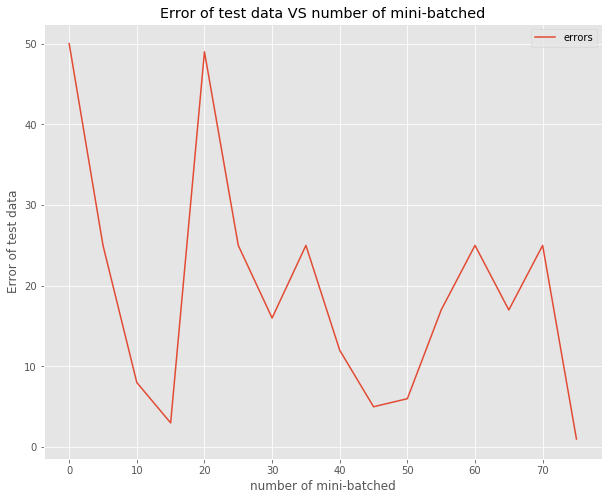

In [15]:
#plot a graph
plt.figure(figsize=(10,8))
plt.plot(df5['errors'],linestyle='-')

#set x-axis  label
plt.xlabel("number of mini-batched")
#set y-axis label
plt.ylabel("Error of test data")
#set title
plt.title('Error of test data VS number of mini-batched')
plt.legend(labels=['errors'])
plt.show()

#### Step IV:
Suppose we did not want to use multiclass Perceptron, and instead would be interested to use the one-versus-one approach to solve the multi-class
classification problem (Chapter 2 in Module 3). The idea is to build K(K−1)/2 classifiers for each possible pair of classes where K is the
number of classes. Each point is then classified according to a majority vote among the discriminant functions.


In [11]:
n_epoch=20  #number of iteration
l_rate=0.1  #learning rate
epsilon=0.001 #threshold for stop iteration

In [12]:
# Make a prediction with weights
def predict_activation(row, weights):
    #activation equals initial bias weight
    activation = weights[0]
    #matrix multiplication to get activation
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    
    #if activation larger then 0, return 1; else, equals 0
    return 1.0 if activation >= 0.0 else 0.0

In [13]:
#traing weights
def train_weights(train, l_rate, n_epoch, epsilon):
    #showing kind of features in training labels
    classes_list=set()
    for each in train:
        classes_list.add(each[-1])
    classes=list(classes_list)
    
    #change feature to 0 or 1
    for each in train:
        for n, i in enumerate(each):
            #if each label equals one of classes feature, then change it
            if i == classes[0]:
                each[n] = 0
            elif i==classes[1]:
                each[n]=1

    #shuffle training set
    training = random.sample(train, len(train))
    #initial random weights
    weights = [random.uniform(0,1) for n in range(len(training[0]))]
    
    #for each iteration
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in training:
            #change datatype to float
            row=[float(i) for i in row]
            #make a prediction
            prediction = predict_activation(row, weights)
            #calculate errors by prediction - real
            error = row[-1] - prediction
            #sum errors
            sum_error += error**2
            #calculate bias weight
            weights[0] = weights[0] + l_rate * error
            
            #calculate weights by using SGD
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]

        # recalculate termination conditions, if error<0.01, then exit for loop
        if sum_error<=epsilon:
            break


    return weights

In [16]:
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    classes_list=set()
    for each in train:
        classes_list.add(each[-1])
    classes=list(classes_list)
    
    #number of features in classes
    K=len(classes)
    
    #calculate how many combinations
    n_combination=K*(K-1)/2
    
    #list all of index combination possibilities
    comb_list=[]
    for passnum in range(K-1,0,-1):
        for i in range(passnum):
            temp_li=[]
            temp_li.append(passnum)
            temp_li.append(i)
            comb_list.append(temp_li)
            
    print(comb_list)
    
    #classfier data into each combo
    models=[]
    for comb in comb_list:
        training_pairs=[]
        for i in comb:
            for row in train:
                if row[-1]==classes[i]:
                    training_pairs.append(row)
        
        #for each combo, change features to 0 or 1
        for element in training_pairs:
            for n, i in enumerate(element):
                if i == classes[comb[0]]:
                    element[n] = 0
                elif i==classes[comb[1]]:
                    element[n]= 1
        
                    
        #predict for each combo
        predictions=[]
        #training weights
        weights = train_weights(training_pairs, l_rate, n_epoch, epsilon)
        print(weights)
        
        #for each row in test data
        for row in test:
            #make datatype to float
            row=[float(i) for i in row[:-1]]+[row[-1]]
            #make a predition
            prediction = predict_activation(row, weights)
            predictions.append(prediction)
            
        #change training labels back
        for element in training_pairs:
            for n, i in enumerate(element):
                if i == 0:
                    element[n] = classes[comb[0]]
                elif i==1:
                    element[n]= classes[comb[1]]
        
        #change prediction labels back
        for idx, pred in enumerate(predictions):
            if pred==0:
                predictions[idx]=classes[comb[0]]
            else:
                predictions[idx]=classes[comb[1]]
        models.append(predictions)
    
    #majority vote
    vote_result=[]
    for i in range(len(models[0])):
        compare_list=[]
        for k in range(len(models)):
            compare_list.append(models[k][i])
        #for each list, check the label with three different results, such as "C1,C2,C3"
        seen=set()
        unique=[x for x in compare_list if x not in seen and not seen.add(x)]
        #if there are no same label in one list
        if len(unique)==len(models):
            #show it as confusion event
            vote_result.append("confusion event")
        else:
            #else output the majority label
            marjoirty=max(set(compare_list), key = compare_list.count)
            vote_result.append(marjoirty)
            
    return vote_result

### Train and Predict:
* a.	Train your K(K-1)/2 perceptron binary classifiers using the training data.
* b.	Predict the labels of the data points in the test set. Whenever there is a tie between two or more labels for a data point, call it a confusion event.

In [19]:
#running program each time, the labels shows differently
perceptron(trainset, testset, l_rate, n_epoch)

[[2, 0], [2, 1], [1, 0]]
[0.4871850948770642, -0.15073164848819243, 0.9656848497723133, -0.6165465129886238, -0.24201067461116224]
[2.021599940905194, 2.1310781366346334, 2.6586808460344953, -3.5920962129214207, -2.5345725821242553]
[0.9688475776914491, -0.3848097109145875, 0.7802905372975555, -0.8040153514961367, -0.1647634589862249]


['C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C1',
 'C2',
 'C1',
 'C1',
 'C1',
 'C1',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C3',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C3',
 'C2',
 'C3',
 'C2',
 'C2',
 'C2',
 'C2',
 'C3',
 'C3',
 'C2',
 'C2',
 'C3',
 'C3',
 'C2',
 'C3']

### Summary:
I test the model several times that I finally see the confusion event even I do not expect to see them. But we have to. From above testing, I observed 4 confusions. The reason is because when building K(K-1)/2 binary discriminat funcetions, each point is classified according to a majority vote among discriminant functions. We decompose 3 classes into binary problems and train pair of classes. After every pair of classes is seperable and train the model. It would result in ambiguous regoins belonging to none of classes. The confusion events are in ambiguous regions which the result of test would contains the whole classes so that it could not be majority voted. However, sometimes confusion event might happen and sometimes not.

In terms of the advantages of OVO multiclass classfication, the problem of unbalanced dataset is often smaller, hence the number of samples which are needed to train the classifier become smaller and actually the training and tuning of the classifier become faster and more accurate. 